Simulación terminada. Generando imagen final...


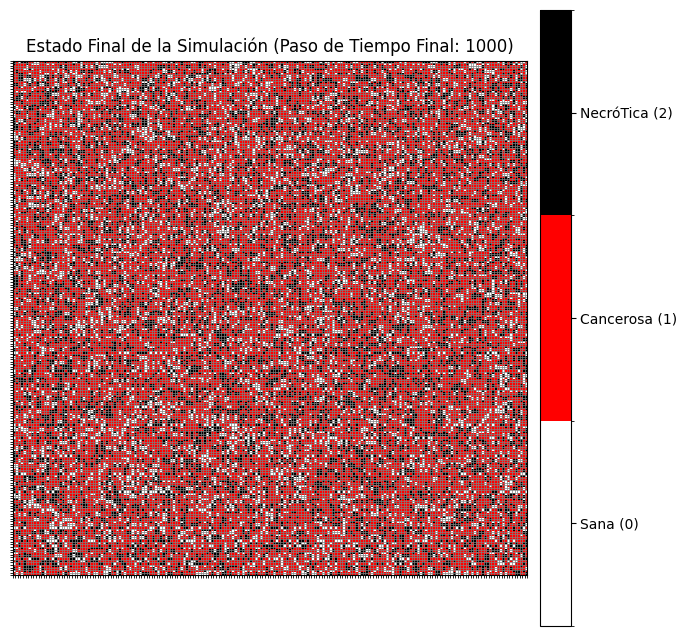

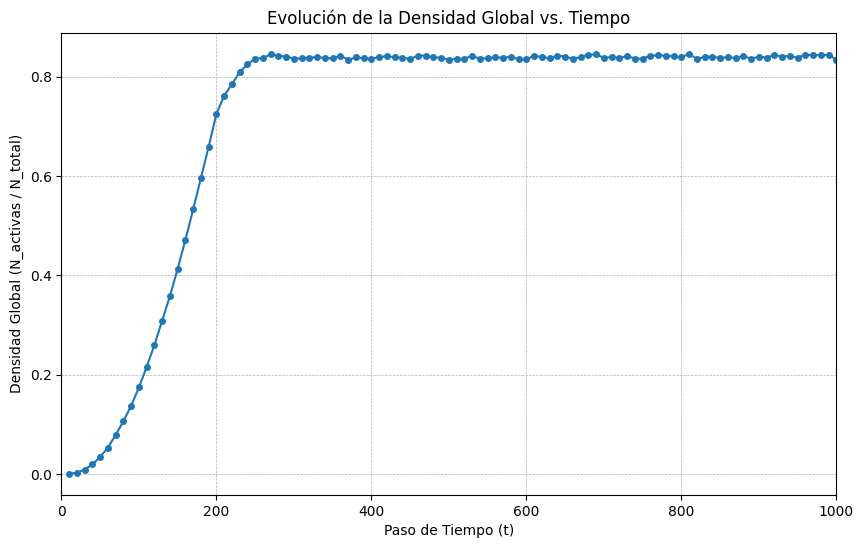

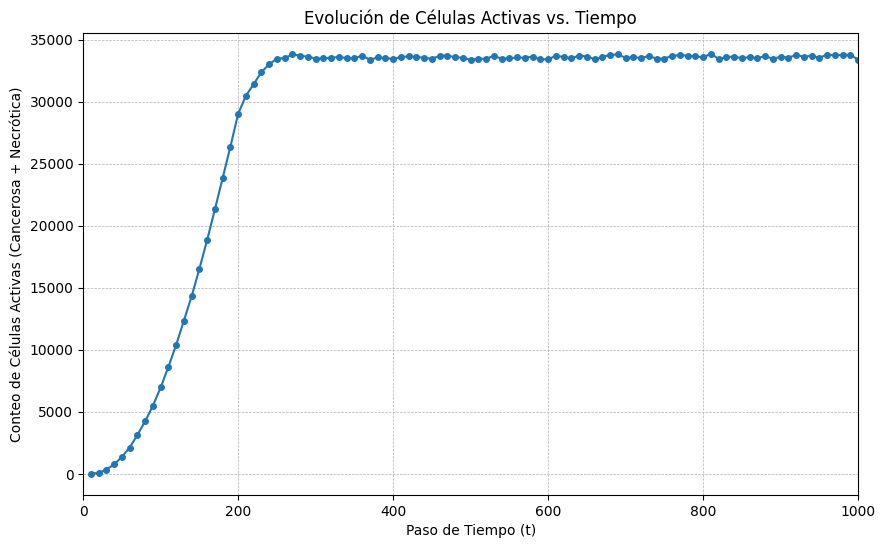

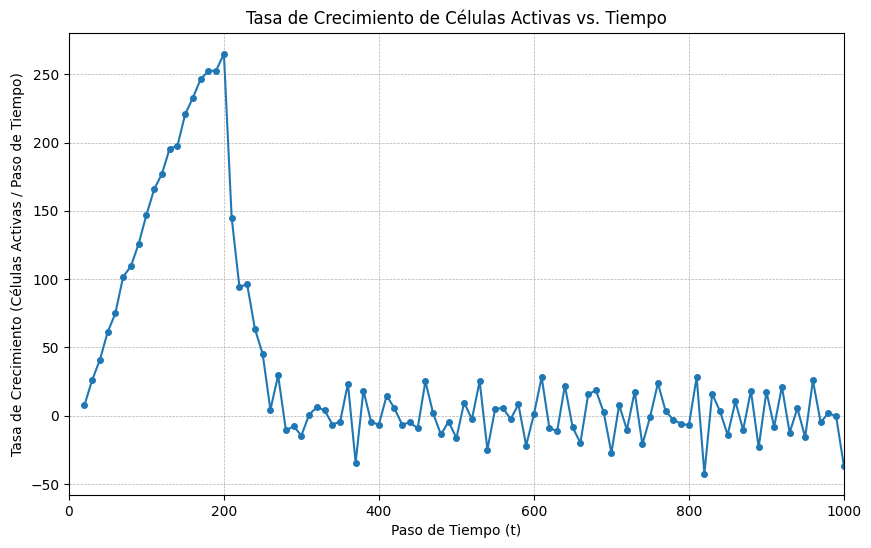

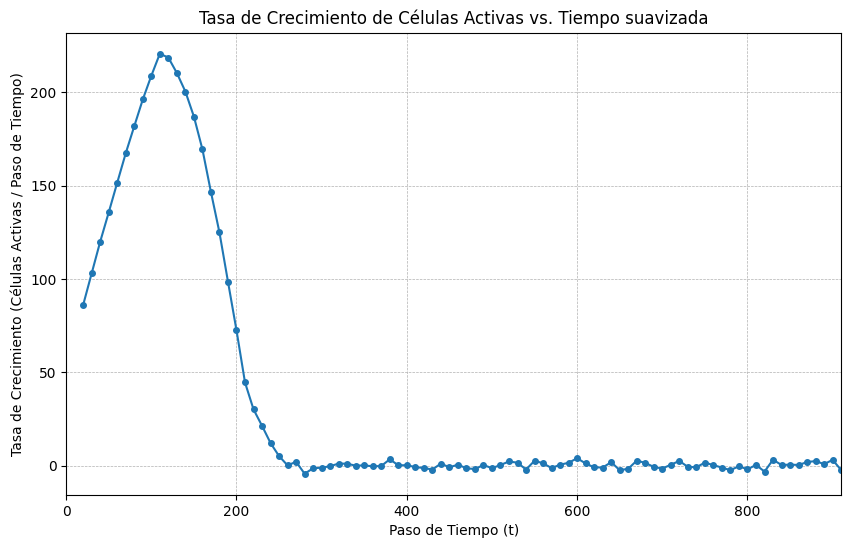

In [ ]:
import Functions_sim as fs


ROWS = 200
COLS = 200
Time_Units = 1000

P_base = {
    'dead': 0.1,
    'migrate': 0.4,
    'reproduce': 0.4,
    'stay': 0.1
}

alpha = 0.5

plot = False

RESISTANCE_SCORE = 0.2

P_clean = 0.5
P_damage = 0.05
P_necro_dead = 0.1

grid = fs.intialize_grid(ROWS, COLS)

active_cell_set = {(ROWS // 2, COLS // 2)} ## Initial active cell is the center cancer cell
total_cells_in_grid = ROWS * COLS

densidad_global = []
celulas_activas = []
time_step_list = []
plot_interval = 10



fs.cycle_simulation(Time_Units, grid, active_cell_set, len(active_cell_set), total_cells_in_grid, P_base, RESISTANCE_SCORE, P_clean, P_damage, P_necro_dead, plot, plot_interval, densidad_global, celulas_activas, time_step_list)

print("Simulación terminada. Generando imagen final...")
fs.plot_grid(grid, title="Estado Final de la Simulación", t_step=Time_Units)

fs.plot_metrics_vs_time(densidad_global, 
                     time_step_list, 
                     "Evolución de la Densidad Global vs. Tiempo", 
                     "Densidad Global (N_activas / N_total)")

fs.plot_metrics_vs_time(celulas_activas, 
                     time_step_list, 
                     "Evolución de Células Activas vs. Tiempo", 
                     "Conteo de Células Activas (Cancerosa + Necrótica)")

rates = fs.calculate_derivative(celulas_activas, time_step_list)

fs.plot_metrics_vs_time(rates, 
                     time_step_list[1:], 
                     "Tasa de Crecimiento de Células Activas vs. Tiempo",
                     "Tasa de Crecimiento (Células Activas / Paso de Tiempo)")

t_smooth, dNdt_smooth = fs.calculate_smooth_derivative(celulas_activas, time_step_list, window_size=10)

fs.plot_metrics_vs_time(dNdt_smooth,
                     t_smooth, 
                     "Tasa de Crecimiento de Células Activas vs. Tiempo suavizada",
                     "Tasa de Crecimiento (Células Activas / Paso de Tiempo)")  
